      RID        X1        X2        X3  ...      X104  MMSCORE  DIAGNOSIS    annual
0     416 -0.447463 -0.592039 -0.270315  ... -0.346383       30          2 -0.486667
1     467 -1.136440 -1.933576 -1.299406  ... -0.658849       19          2 -1.909481
2     626 -1.280644 -2.448946 -1.139093  ... -0.465540       18          2 -2.225610
3     896 -0.919810 -1.631969 -0.082670  ... -0.085939       27          2 -0.958005
4    1190  0.197876  0.514873  0.118839  ... -0.153881       25          2 -0.424449
..    ...       ...       ...       ...  ...       ...      ...        ...       ...
477  6575  0.484849  0.279795  0.250613  ...  0.520766       28          0  0.467288
478  6577  1.004383  1.207295  0.255974  ...  0.591866       29          0  0.000000
479  6580 -0.558234 -0.817042  0.397734  ... -0.564347       27          0  1.019923
480  6581 -0.293139 -0.105274  0.237106  ...  0.551585       30          0  0.000000
481  6582  0.597190  0.689398  0.679606  ...  0.224846       29  

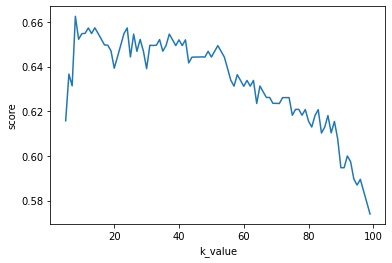

In [148]:
import sklearn.datasets as datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('CogDecline.csv')
mm = MinMaxScaler(feature_range=(0,1))
ss = StandardScaler()
v = VarianceThreshold(threshold=1)
pca = PCA(n_components=33)
DIAGNOSIS_mapping ={'Dementia':2, 'MCI':1, 'NL':0}
df['DIAGNOSIS'] = df['DIAGNOSIS'].map(DIAGNOSIS_mapping)
print(df)
list_columns = df.columns.values.tolist()
target_1 = df['DIAGNOSIS']
target_2 = df['annual']
feature = df[list_columns[1:-2]]
print(feature.shape)
'''
feature = mm.fit_transform(feature)

feature = ss.fit_transform(feature)

feature = v.fit_transform(feature)
'''

feature = pca.fit_transform(feature)


print(feature.shape)
x_train,x_test,y_train,y_test = train_test_split(feature,target_1,test_size=0.2,random_state=100)

scores = []
ks = []
for i in range(5,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    score = cross_val_score(knn,x_train,y_train,cv=10).mean()
    scores.append(score)
    ks.append(i)

scores_arr = np.array(scores)
ks_arr = np.array(ks)

plt.plot(ks_arr,scores_arr)
plt.xlabel('k_value')
plt.ylabel('score')

print(scores_arr.argmax())
print(ks_arr[8])

knn = KNeighborsClassifier(n_neighbors=13)
knn = knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_true = y_test
print(knn.score(x_test,y_test))
print(cross_val_score(knn,x_train,y_train,cv=10).mean())
